In [2]:
# Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('train.csv', low_memory = False)

In [4]:
data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [28]:
data.describe()
# Daily sales are between 0 and 41551 with a mean of 5774. 
# Open, Promo, SchoolHoliday always are between 0 and 1 (that's a sign these are binary features that can be either 0 or 1).

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [5]:
# Data types of columns
data.dtypes

Store             int64
DayOfWeek         int64
Date             object
Sales             int64
Customers         int64
Open              int64
Promo             int64
StateHoliday     object
SchoolHoliday     int64
dtype: object

In [33]:
# Why is StateHoliday an object?
data.StateHoliday.unique() #list all different values of the column
# StateHoliday has both 0 as an integer and a string.
# Solution: Convert whole column to string values.
data.StateHoliday = data.StateHoliday.astype(str)

In [34]:
data.dtypes

Store             int64
DayOfWeek         int64
Date             object
Sales             int64
Customers         int64
Open              int64
Promo             int64
StateHoliday     object
SchoolHoliday     int64
dtype: object

In [35]:
# Count unique values of each column
def count_unique(column):
    return len(column.unique())

data.apply(count_unique, axis=0).astype(np.int64)

Store             1115
DayOfWeek            7
Date               942
Sales            21734
Customers         4086
Open                 2
Promo                2
StateHoliday         4
SchoolHoliday        2
dtype: int64

In [36]:
# Does any column have missing values?
data.isnull().any()

Store            False
DayOfWeek        False
Date             False
Sales            False
Customers        False
Open             False
Promo            False
StateHoliday     False
SchoolHoliday    False
dtype: bool

In [37]:
# Date range of data - 2.5 years
data['Date'].min(), data['Date'].max()

('2013-01-01', '2015-07-31')

In [38]:
#Exploring dates
df = pd.read_csv('train.csv', parse_dates = ['Date'], low_memory = False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
Store            1017209 non-null int64
DayOfWeek        1017209 non-null int64
Date             1017209 non-null datetime64[ns]
Sales            1017209 non-null int64
Customers        1017209 non-null int64
Open             1017209 non-null int64
Promo            1017209 non-null int64
StateHoliday     1017209 non-null object
SchoolHoliday    1017209 non-null int64
dtypes: datetime64[ns](1), int64(7), object(1)
memory usage: 69.8+ MB


In [39]:
#Date Indexing
df.set_index('Date', inplace = True)

In [40]:
df.index

DatetimeIndex(['2015-07-31', '2015-07-31', '2015-07-31', '2015-07-31',
               '2015-07-31', '2015-07-31', '2015-07-31', '2015-07-31',
               '2015-07-31', '2015-07-31',
               ...
               '2013-01-01', '2013-01-01', '2013-01-01', '2013-01-01',
               '2013-01-01', '2013-01-01', '2013-01-01', '2013-01-01',
               '2013-01-01', '2013-01-01'],
              dtype='datetime64[ns]', name='Date', length=1017209, freq=None)

In [41]:
# Add columns with year, month, and weekday name
df['Year'] = df.index.year
df['Month'] = df.index.month
df['Weekday Name'] = df.index.weekday_name

In [43]:
df.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Weekday Name
Date,,,,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1,2015,7,Friday
2015-07-31,2,5,6064,625,1,1,0,1,2015,7,Friday
2015-07-31,3,5,8314,821,1,1,0,1,2015,7,Friday
2015-07-31,4,5,13995,1498,1,1,0,1,2015,7,Friday
2015-07-31,5,5,4822,559,1,1,0,1,2015,7,Friday


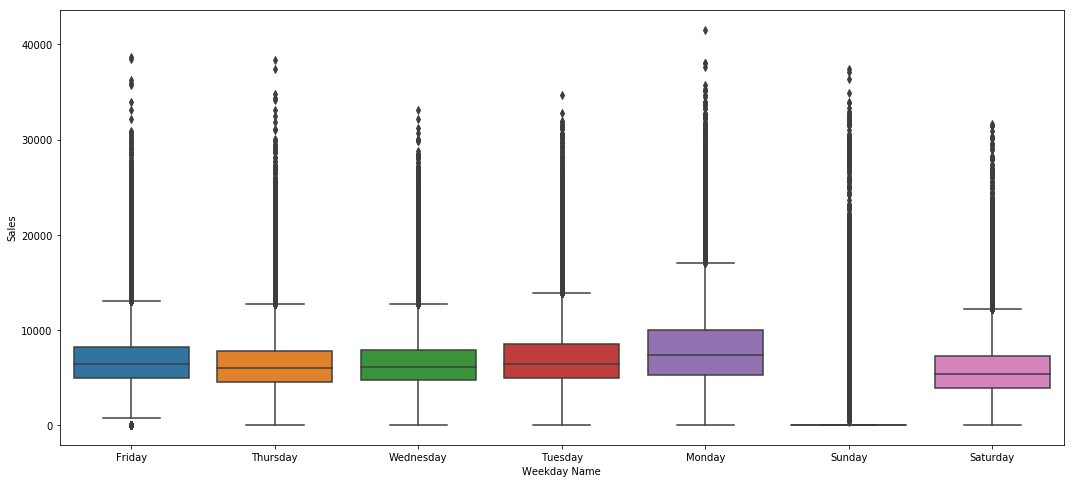

In [44]:
#let’s group the time series by day of the week, to explore weekly seasonality.
sns.boxplot(data=df, x='Weekday Name', y='Sales'); #Closed on Sunday!

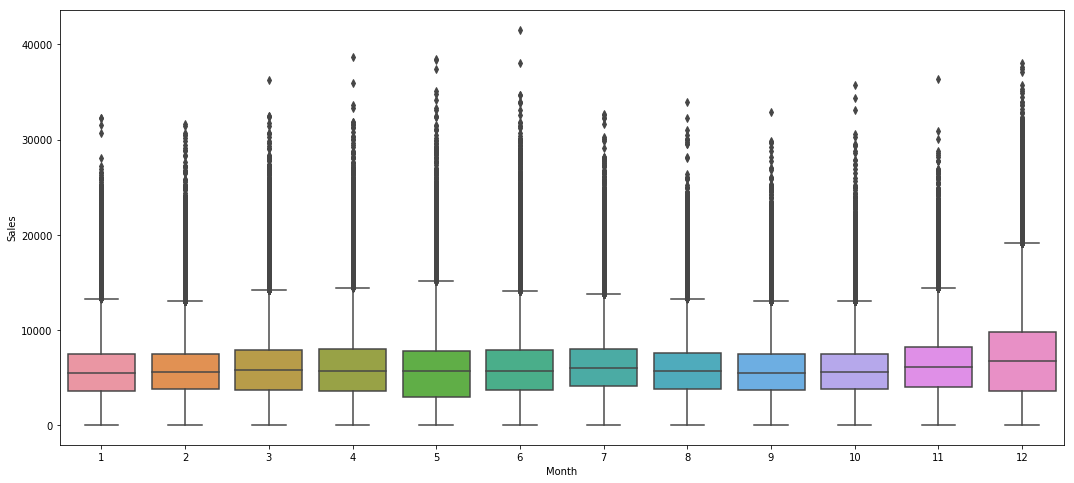

In [45]:
#let’s group the time series by month.
sns.boxplot(data=df, x='Month', y='Sales'); 

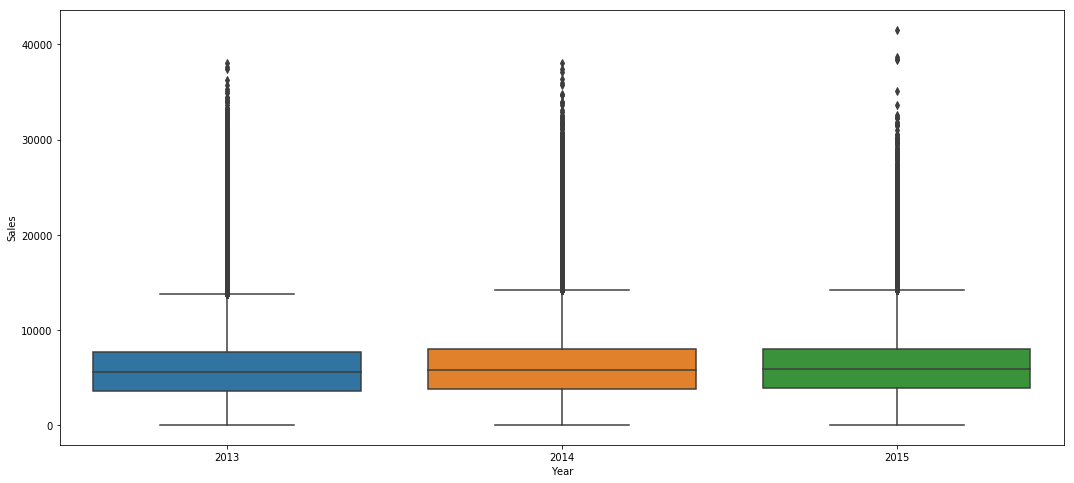

In [46]:
#let’s group the time series by year.
sns.boxplot(data=df, x='Year', y='Sales'); 

In [49]:
y = df['Sales'].resample('MS').mean()

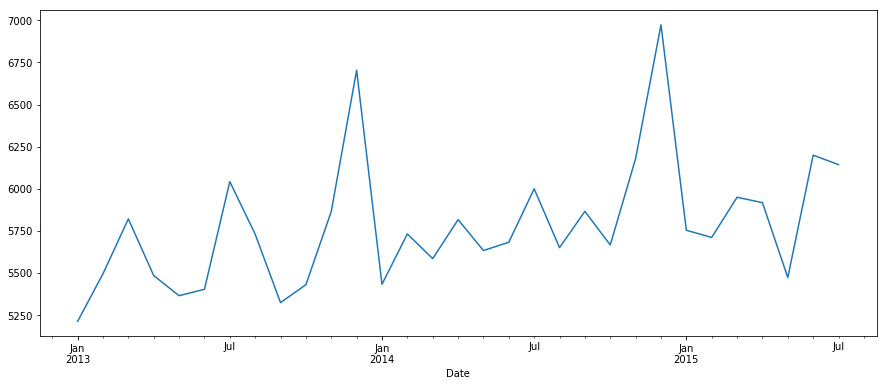

In [50]:
y.plot(figsize=(15, 6))
plt.show()

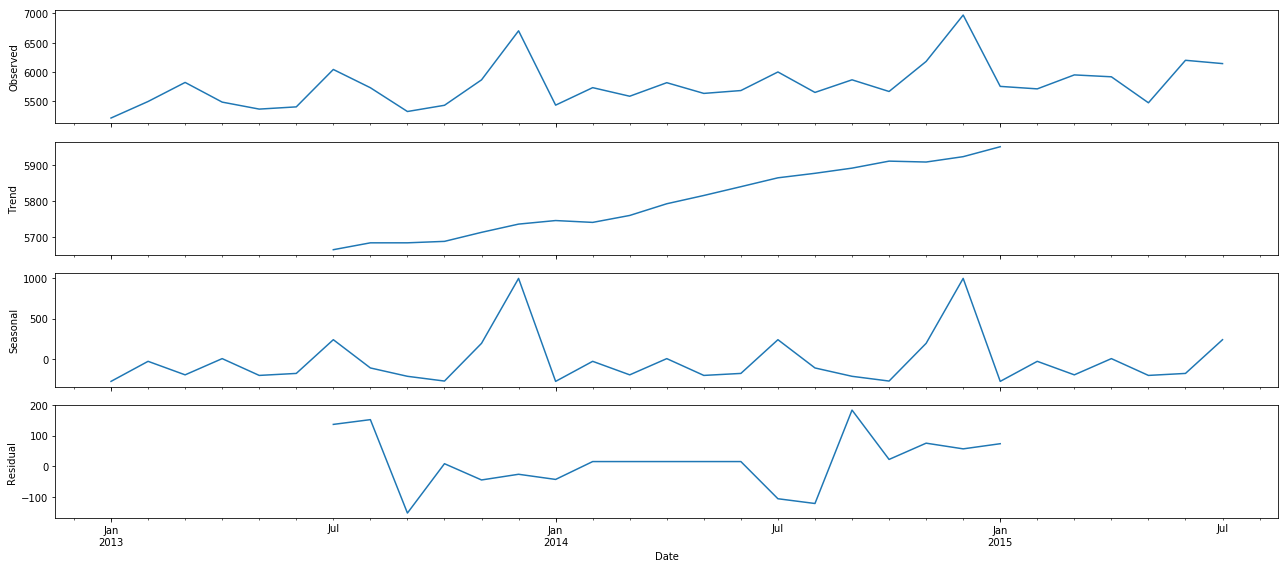

In [51]:
from pylab import rcParams
import statsmodels.api as sm

rcParams['figure.figsize'] = 18, 8

decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

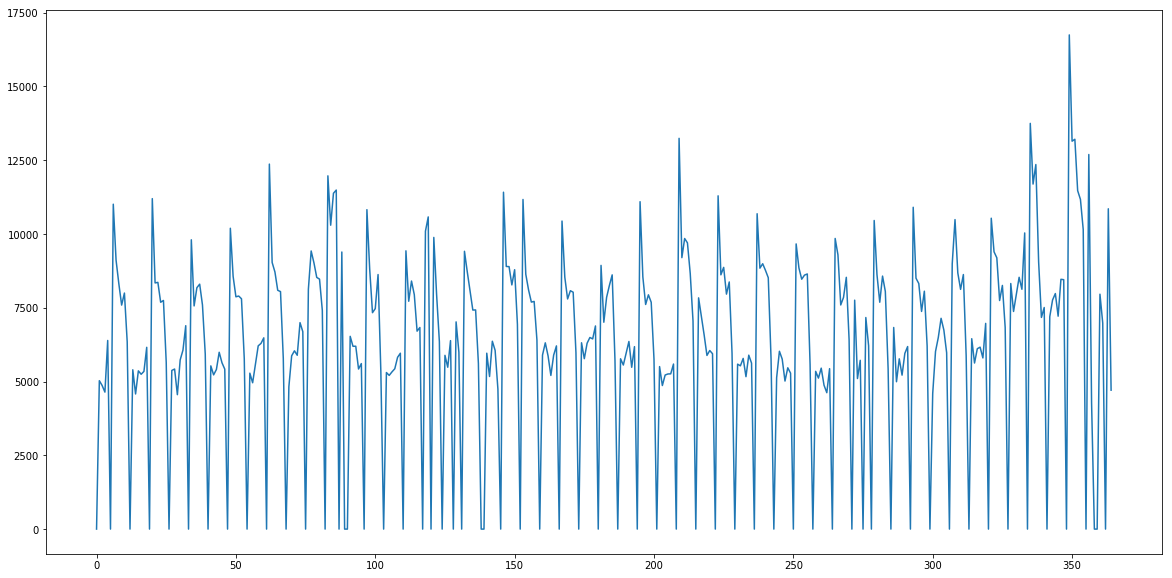

In [52]:
#  sales numbers for a specific store - store 150 - and plots the first 365 days sorted by Date.
store_data = df[df.Store==12].sort_values('Date')
plt.figure(figsize=(20, 10))  # Set figsize to increase size of figure
plt.plot(store_data.Sales.values[:365])